In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# raw keras
from livelossplot.keras import PlotLossesCallback

# tensorflow.keras
# from livelossplot.tf_keras import PlotLossesCallback

Using TensorFlow backend.


In [2]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [4]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

In [5]:
plot_losses = PlotLossesCallback()

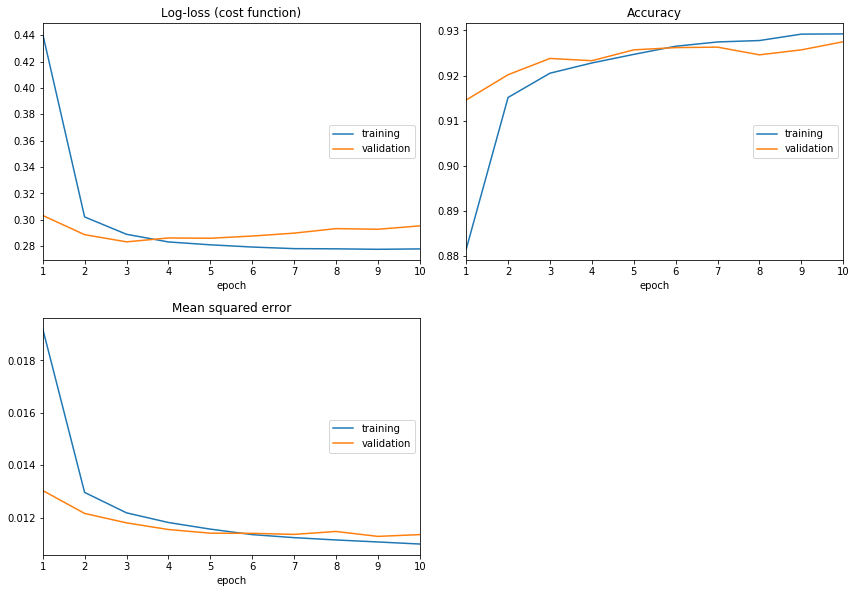

Log-loss (cost function):
training   (min:    0.278, max:    0.441, cur:    0.278)
validation (min:    0.283, max:    0.303, cur:    0.295)

Accuracy:
training   (min:    0.882, max:    0.929, cur:    0.929)
validation (min:    0.915, max:    0.927, cur:    0.927)

Mean squared error:
training   (min:    0.011, max:    0.019, cur:    0.011)
validation (min:    0.011, max:    0.013, cur:    0.011)


In [6]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)